<a href="https://colab.research.google.com/github/SILVIAIRENE/Data-Scientist-Machine-Learning-Engineer-Introductory-Course/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iter 0
Iter 100
Iter 200
Iter 300
Iter 400
Iter 500
Iter 600
Iter 700
Iter 800
Iter 900
Vectores de soporte encontrados: 3

 Evaluación modelo SVM scratch:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

 Comparación con scikit-learn:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


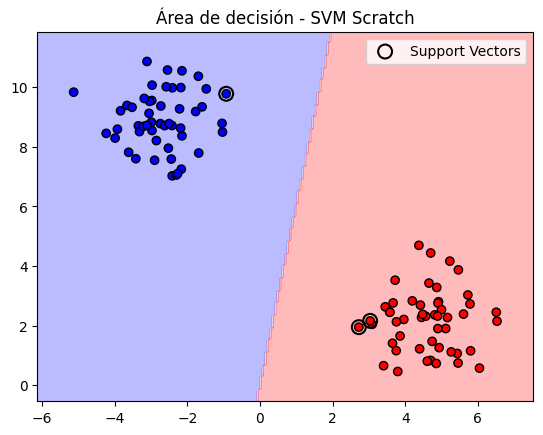


 Evaluación modelo SVM scratch (Kernel Polinomial):
Accuracy: 1.0


In [ ]:

# SVM desde cero (Hard Margin) - Scratch Implementation
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
# Clase ScratchSVMClassifier


class ScratchSVMClassifier():
    """
    Implementación en scratch de clasificadores SVM (hard margin).
    """

    def __init__(self, num_iter=1000, lr=0.001, kernel='linear', threshold=1e-5, verbose=False, gamma=1, theta0=0, d=2):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta0 = theta0
        self.d = d

    def _linear_kernel(self, x1, x2):
        return np.dot(x1, x2)

    def _poly_kernel(self, x1, x2):
        return (self.gamma * np.dot(x1, x2) + self.theta0) ** self.d

    def _kernel(self, x1, x2):
        if self.kernel == "linear":
            return self._linear_kernel(x1, x2)
        elif self.kernel == "polly":  # según enunciado
            return self._poly_kernel(x1, x2)
        else:
            raise ValueError("Kernel no soportado")

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.lambdas = np.zeros(n_samples)

        # Entrenamiento con descenso de gradiente en dual
        for it in range(self.iter):
            for i in range(n_samples):
                sum_term = 0
                for j in range(n_samples):
                    sum_term += self.lambdas[j] * y[j] * self._kernel(X[i], X[j])
                self.lambdas[i] += self.lr * (1 - y[i] * sum_term)
                if self.lambdas[i] < 0:
                    self.lambdas[i] = 0

            if self.verbose and it % 100 == 0:
                print(f"Iter {it}")

      # Identificar vectores de soporte (Problema 2)
        sv = self.lambdas > self.threshold
        self.index_support_vectors = np.where(sv)[0]
        self.lam_sv = self.lambdas[sv]
        self.X_sv = X[sv]
        self.y_sv = y[sv]
        self.n_support_vectors = len(self.lam_sv)

        if self.verbose:
            print(f"Vectores de soporte encontrados: {self.n_support_vectors}")

    def project(self, X):
        y_predict = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for lam, y_sv, x_sv in zip(self.lam_sv, self.y_sv, self.X_sv):
                s += lam * y_sv * self._kernel(X[i], x_sv)
            y_predict[i] = s
        return y_predict

    def predict(self, X):
        return np.sign(self.project(X))



# Problema 4 Entrenamiento y estimación con dataset simple


# Dataset 2D binario
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)  # etiquetas -1, 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar nuestro SVM scratch
svm_scratch = ScratchSVMClassifier(num_iter=1000, lr=0.001, kernel="linear", verbose=True)
svm_scratch.fit(X_train, y_train)

y_pred = svm_scratch.predict(X_test)

print("\n Evaluación modelo SVM scratch:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Comparación con Scikit-learn
svm_sklearn = SVC(kernel="linear", C=1e10)  # C grande ≈ hard margin
svm_sklearn.fit(X_train, y_train)
y_pred_sk = svm_sklearn.predict(X_test)

print("\n Comparación con scikit-learn:")
print("Accuracy:", accuracy_score(y_test, y_pred_sk))
print("Precision:", precision_score(y_test, y_pred_sk))
print("Recall:", recall_score(y_test, y_pred_sk))



# Problema 5 Visualización del área de decisión


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, edgecolors="k")

    # Resaltar vectores de soporte
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], s=100, facecolors='none', edgecolors='k', linewidths=1.5, label="Support Vectors")

    plt.title("Área de decisión - SVM Scratch")
    plt.legend()
    plt.show()

plot_decision_boundary(svm_scratch, X, y)



# Problema 6 Kernel polinomial


svm_poly = ScratchSVMClassifier(num_iter=1000, lr=0.001, kernel="polly", gamma=1, theta0=1, d=2)
svm_poly.fit(X_train, y_train)

y_pred_poly = svm_poly.predict(X_test)
print("\n Evaluación modelo SVM scratch (Kernel Polinomial):")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
